In [1]:
# duz_ysa_mnist.ipynb

In [2]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

2023-12-09 10:48:58.732655: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-09 10:48:58.733917: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-09 10:48:58.756172: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-09 10:48:58.756203: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-09 10:48:58.756218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
import numpy as np
np.set_printoptions(linewidth=300)

rakam=10

print(train_images[rakam])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   

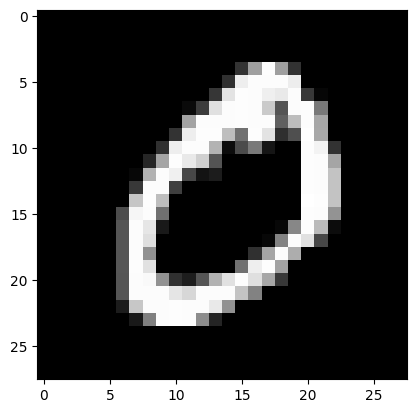

etiket: 0


In [5]:
import matplotlib.pyplot as plt

rakam = 1
plt.imshow(train_images[rakam],cmap="gray")
plt.show()
print("etiket:",train_labels[rakam])



In [6]:
# 0-255 arası değer alan gri tonlamalı pikseller, aşağıdaki işlem ile ilk önce float32 tipine dönüştürülüp 0-1 arasına normalize edilir.
train_images = train_images.astype("float32")/255
test_images=test_images.astype("float32")/255

In [7]:
from keras.utils import to_categorical
print(train_labels[0:5])
print(test_labels[0:5])
# one-hot encoding 1-satırı 1 kodlama
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels[0:5])
print(test_labels[0:5])

[5 0 4 1 9]
[7 2 1 0 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.callbacks import ModelCheckpoint
# 6-layer 784-2500-2000-1500-1000-500-10
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(2500,activation="relu"))
model.add(Dense(2000,activation="relu"))
model.add(Dense(1500,activation="relu"))
model.add(Dense(1000,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
cp=ModelCheckpoint("duz_mnist.h5",monitor="accuracy",mode="max",save_best_only=True)


2023-12-09 10:49:00.350062: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-09 10:49:00.350284: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
history=model.fit(train_images,train_labels,validation_split=0.2,epochs=5,callbacks=[cp])

Epoch 1/5
 451/1500 [========>.....................] - ETA: 1:20 - loss: 0.5865 - accuracy: 0.8296

KeyboardInterrupt: 

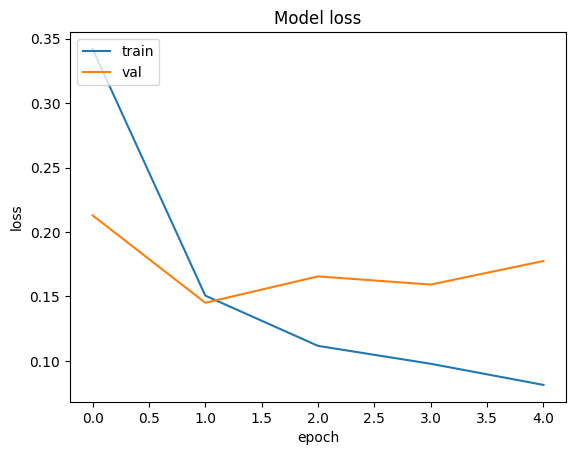

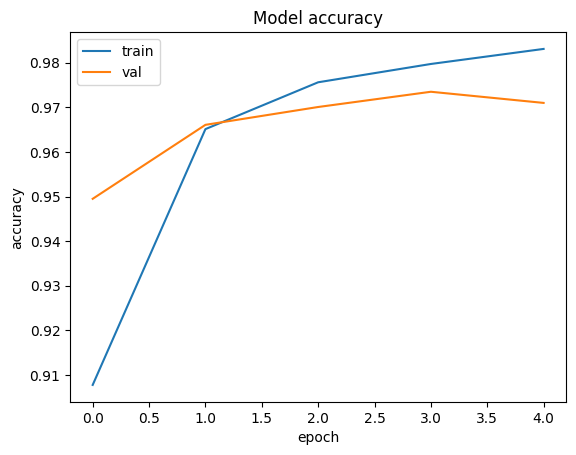

In [ ]:
import matplotlib.pyplot as plt
#loss 
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()
#accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()


In [ ]:
# hiç görmediği test veriler ile ölçüm yapalım
sinav=model.evaluate(test_images,test_labels)
print("loss:",sinav[0])
print("accuracy:",sinav[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.1491 - accuracy: 0.9740
loss: 0.14913353323936462
accuracy: 0.9739999771118164


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 2500)              1962500   
                                                                 
 dense_1 (Dense)             (None, 2000)              5002000   
                                                                 
 dense_2 (Dense)             (None, 1500)              3001500   
                                                                 
 dense_3 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                                 
 dense_5 (Dense)             (None, 10)                5

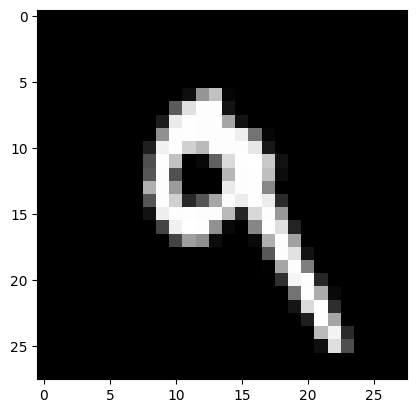

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1/1 [==============================] - 0s 14ms/step
tahmin: 9
0 için oran: 1.2866391e-10
1 için oran: 1.8683934e-17
2 için oran: 2.1743811e-12
3 için oran: 3.6600602e-07
4 için oran: 2.0442121e-09
5 için oran: 1.8387611e-12
6 için oran: 2.7048315e-13
7 için oran: 1.8681895e-10
8 için oran: 7.584069e-12
9 için oran: 0.99999964


In [ ]:
rakam=7
plt.imshow(test_images[rakam],cmap="gray")
plt.show()
print(test_labels[rakam])

tahmin=model.predict(test_images[rakam].reshape(1,28,28))
print("tahmin:",np.argmax(tahmin))
for i in range(10):
    print(i,"için oran:",tahmin[0,i])
